In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0, 10.0)

In [2]:
#sample dataset
data = pd.read_csv('Downloads/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

# Linear Regression using algorithm

In [4]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

n=len(X)

numer = 0
denom = 0
for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i] - mean_x)**2
m=numer/denom
c=mean_y-(m*mean_x)

print(m,c)

0.26342933948939945 325.57342104944223


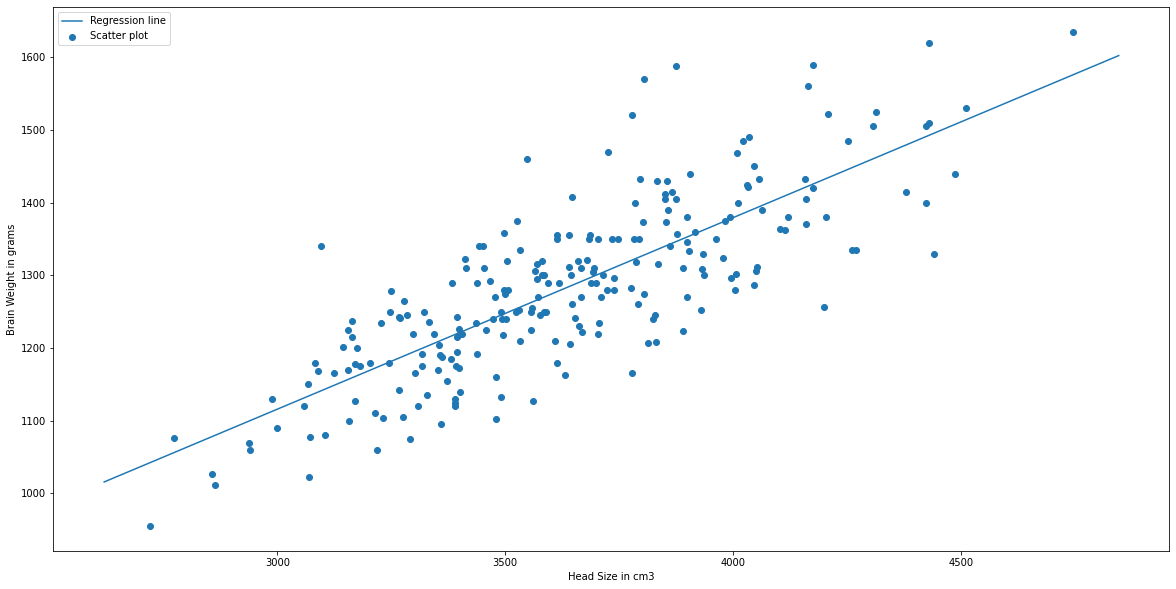

In [5]:
max_x= np.max(X)+100
min_x = np.min(X)-100

x=np.linspace(min_x, max_x, 1000)
y = m*x + c

plt.plot(x, y, label='Regression line')
plt.scatter(X, Y, label='Scatter plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [6]:
ss_t=0
ss_r=0
for i in range(n):
    y_pred = m*X[i] + c
    ss_t += (Y[i]-mean_y)**2
    ss_r += (Y[i] - y_pred)**2
r2=1-(ss_r/ss_t)
r2

0.6393117199570003

# Linear Regression using scikitlearn

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

#Cannot use Rank 1 matrix in scikit learn
X= X.reshape((n,1))
#creating model
reg = LinearRegression()
#fitting training data
reg = reg.fit(X, Y)
#Y prediction
Y_pred = reg.predict(X)

r2_score = reg.score(X,Y)
r2_score

0.639311719957